# MCO4: Final Project Presentation

### DATA100 S11 Group 11
- Abenoja, Amelia Joyce
- Aquino, Karl Andre
- Miranda, Bien Aaron

## Stroke Prediction

Source: Fedesoriano @ Kaggle (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset).

Data Set Information: This dataset is designed to help train machine learning models in predicting the likelihood of a patient experiencing a stroke. The dataset contains records for 5110 observations. For each respondent represented in a row, 11 attributes are known:

**Features**

- **Health Indicators** which include:

    - **Hypertension**: This indicates whether the patient has high blood pressure (0 = No, 1 = Yes).

    - **Heart Disease**: This indicates whether the patient has a history of heart disease (0 = No, 1 = Yes).

    - **Average Glucose Level**: This represents the average level of glucose in the patient's blood.

    - **BMI**: This is the patient's Body Mass Index (a measure of body fat based on height and weight).

    - **Smoking Status**: This is a categorical variable indicating the patient's smoking history (formerly smoked, never smoked, smokes, Unknown).

- **Demographics** which include:

    - **Gender**: This indicates whether the patient is male or female.

    - **Age**: This represents the patient's age in years.

    - **Ever Married**: This indicates whether the patient has ever been married (Yes/No).

    - **Work Type**: This describes the type of employment the patient has (e.g., Private, Self-employed, Govt_job, Never_worked, children).

    - **Residence Type**: This indicates whether the patient resides in an urban or rural area.

**Target**

- **Stroke**. This indicates whether the patient has had a stroke (0 = No, 1 = Yes).

## OBJECTIVE

You are a data scientist tapped by the Philippine Government to conduct research on the **most significant risk factors** contributing to **stroke occurrence**.


#### 1. (1 pt) Open the data and remove the columns irrelevant to the modeling.

In [1]:
# #Mount the google drive
# from google.colab import drive
# import os

# drive.mount("/content/gdrive")
# path = "/content/gdrive/MyDrive/DATA100 2nd term AY 2023-2024"

# os.chdir(path)

In [14]:
# install imblearn
!pip install -U imbalanced-learn

# install seaborn
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------- ------------------------------- 61.4/294.9 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import warnings
import numpy as np
from imblearn.over_sampling import RandomOverSampler

warnings.filterwarnings("ignore")

#df = pd.read_csv('./datasets/healthcare-dataset-stroke-data.csv', index_col=0)

df = pd.read_csv('./healthcare-dataset-stroke-data.csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df = df.reset_index(drop=True)
df.head()



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### 2. (2 pts) Provide summary statistics for the Health Indicators. (3 pts)

In [5]:
incl_cols = ['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']

df[incl_cols].describe()

,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,0.097456,0.054012,106.147677,28.893237
std,0.296607,0.226063,45.283560,7.854067
min,0.000000,0.000000,55.120000,10.300000
25%,0.000000,0.000000,77.245000,23.500000
50%,0.000000,0.000000,91.885000,28.100000
75%,0.000000,0.000000,114.090000,33.100000
max,1.000000,1.000000,271.740000,97.600000


#### 3. (2 pts) Provide summary statistics for the Demographics.

In [6]:
incl_cols = ['gender', 'age', 'ever_married', 'work_type','Residence_type']

df[incl_cols].describe()

,age
count,5110.000000
mean,43.226614
std,22.612647
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


#### 4. (1 pt) Count how many respondents had each smoking status.

In [7]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

#### 5. (1 pt) Count the number of respondents per age group.

In [8]:
# Define the age groups
age_groups = ['<18', '18-30', '31-40', '41-50', '51-60', '61+']
age_ranges = [0, 18, 30, 40, 50, 60, float('inf')]
df['age'] = pd.cut(df['age'], bins=age_ranges, labels=age_groups, right=False)
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,61+,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61+,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,61+,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,41-50,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,61+,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
df['age'].value_counts()

age
61+      1376
<18       856
51-60     834
41-50     730
18-30     659
31-40     655
Name: count, dtype: int64

#### 6. (1 pt) Count how many null values are in each column in the dataset

In [10]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### 7. (2 pts) Deal with the null values and confirm by counting the number of null values again.

In [11]:
df = df.dropna()
df = df[df['smoking_status'] != 'Unknown']
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,61+,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,61+,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,41-50,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,61+,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,61+,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5100,68398,Male,61+,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,45010,Female,51-60,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,44873,Female,61+,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,31-40,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [12]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### 8a. (1 pt) Show a correlation matrix for the Health Indicator columns.

<Axes: >

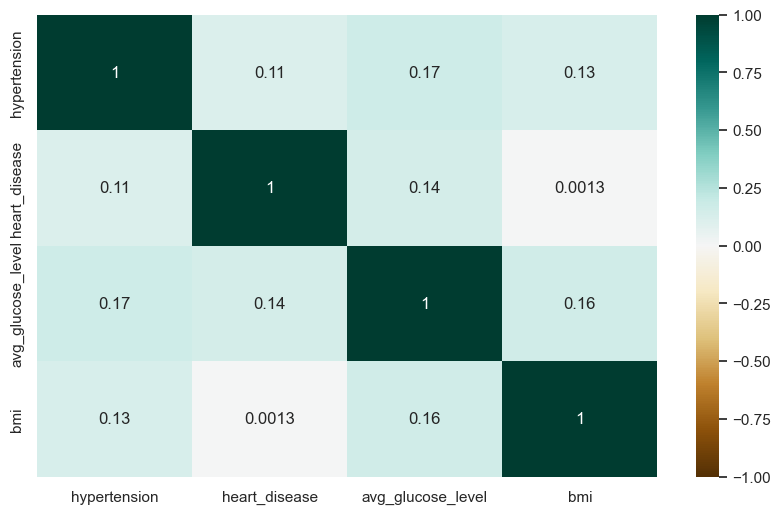

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig, ax = plt.subplots(1,1, figsize=(10,6))
# REMINDER: INCLUDE NUMERICAL COLUMNS IN THE CORRELATION MATRIX ONLY!!!!!
# DROP THE TARGET AND OTHER CATEGORICAL COLUMNS

incl_columns_corr = ['hypertension','heart_disease','avg_glucose_level','bmi']
sns.heatmap(df[incl_columns_corr].corr(),
            vmin=-1, vmax=1, annot=True,
            ax=ax, cmap='BrBG')

#### 8b. Homework (Ungraded). Using the EDA template, select 3 variables of choice and use the EDA excel template + Jupyter notebook code to explore addiction rates.

#### 9. (2 pts) Show the class distribution

Counter({1: 3246, 0: 3246})


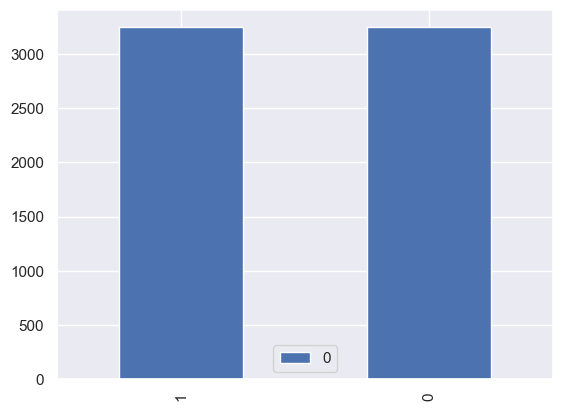

In [16]:
from collections import Counter

# Due to imbalanced distribution, random oversampling is applied
X = df.drop('stroke',axis=1) # feature
y = df['stroke']

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

# the PCC will be computed based on the distribution of the ACTUAL labels
y_true = y_res

state_counts = Counter(y_true)
print(state_counts)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2

#### 10. (1 pt) What is the minimum required accuracy for the model to be deemed significant?

In [17]:
print(f"PCC: {100*num.sum()}")

pcc125 = 1.25*100*num.sum()
print("1.25 * Proportion Chance Criterion: {}%".format(pcc125))

PCC: 50.0
1.25 * Proportion Chance Criterion: 62.5%


#### 11. (1 pt) Extract features and target

In [18]:
X = df.drop('stroke',axis=1) # feature
y = df['stroke']

#### 12. (2 pts) Perform one-hot encoding on the feature matrix **IF NECESSARY** (X)

In [19]:
X = pd.get_dummies(X, drop_first=True)
X = X.astype(int)

X

,id,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,age_18-30,age_31-40,age_41-50,age_51-60,age_61+,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,9046,0,1,228,36,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0
2,31112,0,1,105,32,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0
3,60182,0,0,171,34,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1
4,1665,1,0,174,24,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0
5,56669,0,0,186,29,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,68398,1,0,71,28,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0
5102,45010,0,0,77,21,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
5106,44873,0,0,125,40,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0
5107,19723,0,0,82,30,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0


#### 13. (1 pt) Print all feature names

In [20]:
print(X.columns)

Index(['id', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Male', 'gender_Other', 'age_18-30', 'age_31-40', 'age_41-50',
       'age_51-60', 'age_61+', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


#### 14. (10 pts) Implement the model selection pipeline

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from itertools import product

In [22]:
def fit_kNN(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Apply random oversampling
    Xtrain_ros, ytrain_ros = ros.fit_resample(X_train, y_train)

    neighbors_settings = range(1, 20, 2)

    train_all = []
    test_all = []
    results = []

    for n_neighbors in neighbors_settings:
        # build the model
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(Xtrain_ros, ytrain_ros)
        # record training set accuracy
        train_acc = model.score(Xtrain_ros, ytrain_ros)
        train_all.append(train_acc)
        # record generalization accuracy
        test_acc = model.score(X_test, y_test)
        test_all.append(test_acc)

        results.append([n_neighbors, train_acc, test_acc])

    results = pd.DataFrame(results, columns=['n_neighbors',
                                    'train_acc',
                                    'test_acc']).sort_values('test_acc', ascending=False)
    results['train_test_diff'] = results['train_acc'] - results['test_acc']
    fig, ax = plt.subplots(1,1, figsize=(6,4))

    ax.plot(neighbors_settings, train_all, '-bo', label="training set")
    ax.plot(neighbors_settings, test_all, '-ro', label="test set")
    ax.set_xlabel("C")
    ax.set_ylabel("Accuracy")
    ax.legend()

    return results

,n_neighbors,train_acc,test_acc,train_test_diff
0,1,1.000000,0.905642,0.094358
1,3,0.976002,0.881323,0.094679
2,5,0.957508,0.850195,0.107313
3,7,0.943197,0.823930,0.119267
4,9,0.921180,0.781128,0.140052
5,11,0.897402,0.742218,0.155184
6,13,0.879789,0.701362,0.178427
7,15,0.862836,0.673152,0.189684
8,17,0.846103,0.637160,0.208944
9,19,0.828710,0.608949,0.219760


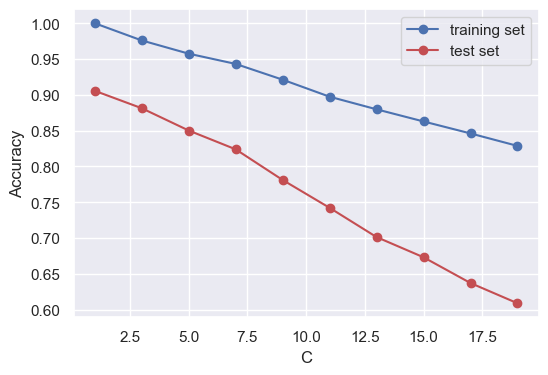

In [23]:
results_knn = fit_kNN(X, y)
results_knn

In [24]:
def fit_logregl2(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Apply random oversampling
    Xtrain_ros, ytrain_ros = ros.fit_resample(X_train, y_train)

    C_settings = [1e-3, 1e-2, 0.1, 1, 10, 15, 20, 100, 1000]

    train_all = []
    test_all = []
    results = []

    for C in C_settings:
        # build the model
        model = LogisticRegression(C=C, penalty='l2')
        model.fit(Xtrain_ros, ytrain_ros)
        # record training set accuracy
        train_acc = model.score(Xtrain_ros, ytrain_ros)
        train_all.append(train_acc)
        # record generalization accuracy
        test_acc = model.score(X_test, y_test)
        test_all.append(test_acc)

        results.append([C, train_acc, test_acc])

    results = pd.DataFrame(results, columns=['C',
                                    'train_acc',
                                    'test_acc']).sort_values('test_acc', ascending=False)
    results['train_test_diff'] = results['train_acc'] - results['test_acc']


    fig, ax = plt.subplots(1,1, figsize=(6,4))

    ax.set_xscale('log')
    ax.plot(C_settings, train_all, '-bo', label="training set")
    ax.plot(C_settings, test_all, '-ro', label="test set")
    ax.set_xlabel("C")
    ax.set_ylabel("Accuracy")
    ax.legend()

    return results

,C,train_acc,test_acc,train_test_diff
1,0.010,0.746693,0.726654,0.020039
2,0.100,0.746914,0.720817,0.026096
3,1.000,0.746032,0.718872,0.027160
4,10.000,0.746473,0.717899,0.028574
5,15.000,0.746252,0.717899,0.028353
6,20.000,0.746473,0.717899,0.028574
7,100.000,0.746032,0.717899,0.028133
8,1000.000,0.746032,0.717899,0.028133
0,0.001,0.716711,0.714981,0.001730


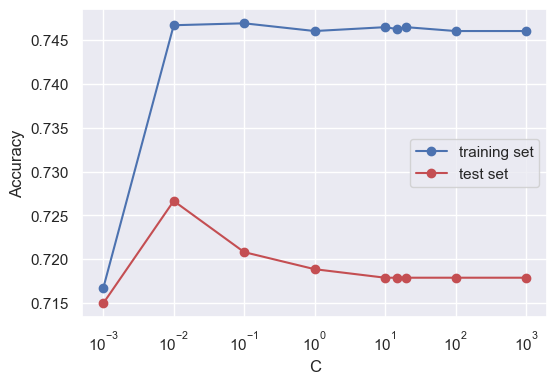

In [25]:
results_logregl2 = fit_logregl2(X,y)
results_logregl2

In [26]:
def fit_logregl1(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

     # Apply random oversampling
    Xtrain_ros, ytrain_ros = ros.fit_resample(X_train, y_train)

    C_settings = [1e-3, 1e-2, 0.1, 1, 10, 15, 20, 100, 1000]

    train_all = []
    test_all = []
    results = []

    for C in C_settings:
        # build the model
        model = LogisticRegression(C=C, penalty='l1', solver='liblinear',  max_iter=10000)
        model.fit(Xtrain_ros, ytrain_ros)
        # record training set accuracy
        train_acc = model.score(Xtrain_ros, ytrain_ros)
        train_all.append(train_acc)
        # record generalization accuracy
        test_acc = model.score(X_test, y_test)
        test_all.append(test_acc)

        results.append([C, train_acc, test_acc])

    results = pd.DataFrame(results, columns=['C',
                                    'train_acc',
                                    'test_acc']).sort_values('test_acc', ascending=False)
    results['train_test_diff'] = results['train_acc'] - results['test_acc']


    fig, ax = plt.subplots(1,1, figsize=(6,4))

    ax.set_xscale('log')
    ax.plot(C_settings, train_all, '-bo', label="training set")
    ax.plot(C_settings, test_all, '-ro', label="test set")
    ax.set_xlabel("C")
    ax.set_ylabel("Accuracy")
    ax.legend()

    return results

,C,train_acc,test_acc,train_test_diff
1,0.010,0.720536,0.698444,0.022093
0,0.001,0.606860,0.667315,-0.060455
2,0.100,0.750220,0.663424,0.086796
3,1.000,0.751099,0.663424,0.087675
4,10.000,0.751319,0.662451,0.088868
5,15.000,0.751539,0.662451,0.089088
6,20.000,0.751539,0.662451,0.089088
7,100.000,0.751539,0.662451,0.089088
8,1000.000,0.751539,0.662451,0.089088


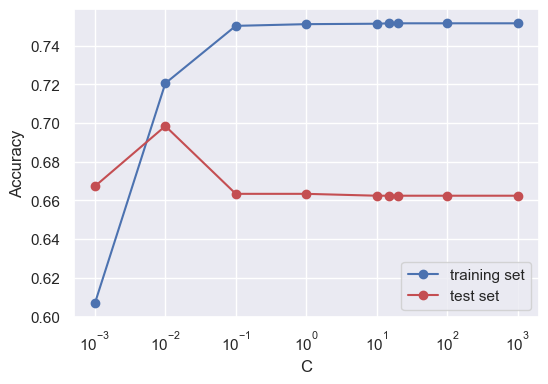

In [27]:
results_logregl1 = fit_logregl1(X,y)
results_logregl1

In [28]:
def fit_SVMl2(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

     # Apply random oversampling
    Xtrain_ros, ytrain_ros = ros.fit_resample(X_train, y_train)

    C_settings = [1e-3, 1e-2, 0.1, 1, 10, 15, 20, 100, 1000]

    train_all = []
    test_all = []
    results = []

    for C in C_settings:
        # build the model
        model = LinearSVC(penalty='l2', C=C, max_iter=100000)
        model.fit(Xtrain_ros, ytrain_ros)
        # record training set accuracy
        train_acc = model.score(Xtrain_ros, ytrain_ros)
        train_all.append(train_acc)
        # record generalization accuracy
        test_acc = model.score(X_test, y_test)
        test_all.append(test_acc)

        results.append([C, train_acc, test_acc])

    results = pd.DataFrame(results, columns=['C',
                                    'train_acc',
                                    'test_acc']).sort_values('test_acc', ascending=False)
    results['train_test_diff'] = results['train_acc'] - results['test_acc']


    fig, ax = plt.subplots(1,1, figsize=(6,4))

    ax.set_xscale('log')
    ax.plot(C_settings, train_all, '-bo', label="training set")
    ax.plot(C_settings, test_all, '-ro', label="test set")
    ax.set_xlabel("C")
    ax.set_ylabel("Accuracy")
    ax.legend()

    return results

,C,train_acc,test_acc,train_test_diff
4,10.000,0.557939,0.912451,-0.354512
7,100.000,0.631137,0.826848,-0.195712
3,1.000,0.641309,0.798638,-0.157329
2,0.100,0.643299,0.763619,-0.120319
8,1000.000,0.599956,0.441634,0.158322
5,15.000,0.593985,0.403696,0.190288
6,20.000,0.526537,0.157588,0.368949
1,0.010,0.522556,0.078794,0.443763
0,0.001,0.519460,0.072957,0.446503


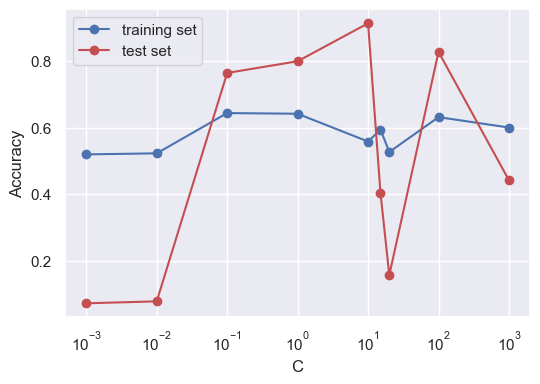

In [29]:
results_svml2 = fit_SVMl2(X, y)
results_svml2

In [30]:
def fit_SVMl1(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # Apply random oversampling
    Xtrain_ros, ytrain_ros = ros.fit_resample(X_train, y_train)

    C_settings = [1e-3, 1e-2, 0.1, 1, 10, 15, 20, 100, 1000]

    train_all = []
    test_all = []
    results = []

    for C in C_settings:
        # build the model
        model = LinearSVC(penalty='l1', dual=False, C=C, max_iter=100000)
        model.fit(Xtrain_ros, ytrain_ros)
        # record training set accuracy
        train_acc = model.score(Xtrain_ros, ytrain_ros)
        train_all.append(train_acc)
        # record generalization accuracy
        test_acc = model.score(X_test, y_test)
        test_all.append(test_acc)

        results.append([C, train_acc, test_acc])

    results = pd.DataFrame(results, columns=['C',
                                    'train_acc',
                                    'test_acc']).sort_values('test_acc', ascending=False)
    results['train_test_diff'] = results['train_acc'] - results['test_acc']


    fig, ax = plt.subplots(1,1, figsize=(6,4))

    ax.set_xscale('log')
    ax.plot(C_settings, train_all, '-bo', label="training set")
    ax.plot(C_settings, test_all, '-ro', label="test set")
    ax.set_xlabel("C")
    ax.set_ylabel("Accuracy")
    ax.legend()

    return results

,C,train_acc,test_acc,train_test_diff
1,0.010,0.734272,0.700389,0.033883
3,1.000,0.735152,0.688716,0.046436
2,0.100,0.734052,0.687743,0.046309
4,10.000,0.733832,0.687743,0.046089
7,100.000,0.728993,0.687743,0.041249
8,1000.000,0.729432,0.687743,0.041689
5,15.000,0.728993,0.686770,0.042222
6,20.000,0.729212,0.686770,0.042442
0,0.001,0.676639,0.670233,0.006405


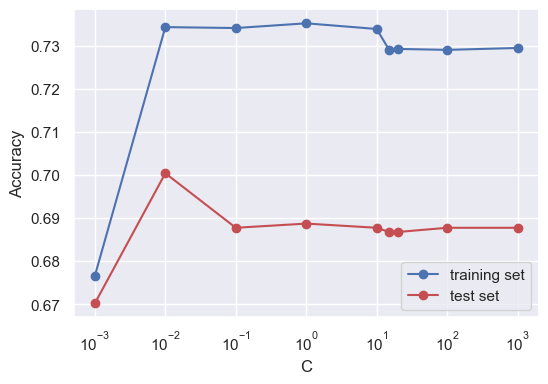

In [31]:
results_svml1 = fit_SVMl1(X, y)
results_svml1

In [32]:
def fit_dtree(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Apply random oversampling
    Xtrain_ros, ytrain_ros = ros.fit_resample(X_train, y_train)

    max_depth_settings = range(1, 11)

    train_all = []
    test_all = []
    results = []

    for max_depth in max_depth_settings:
        # build the model
        model = DecisionTreeClassifier(max_depth=max_depth)
        model.fit(Xtrain_ros, ytrain_ros)
        # record training set accuracy
        train_acc = model.score(Xtrain_ros, ytrain_ros)
        train_all.append(train_acc)
        # record generalization accuracy
        test_acc = model.score(X_test, y_test)
        test_all.append(test_acc)

        results.append([max_depth, train_acc, test_acc])

    results = pd.DataFrame(results, columns=['max_depth',
                                    'train_acc',
                                    'test_acc']).sort_values('test_acc', ascending=False)
    results['train_test_diff'] = results['train_acc'] - results['test_acc']


    fig, ax = plt.subplots(1,1, figsize=(6,4))
    ax.plot(max_depth_settings, train_all, '-bo', label="training set")
    ax.plot(max_depth_settings, test_all, '-ro', label="test set")
    ax.set_xlabel("max_depth")
    ax.set_ylabel("Accuracy")
    ax.legend()

    return results

,max_depth,train_acc,test_acc,train_test_diff
9,10,0.944858,0.844358,0.100500
8,9,0.924508,0.827821,0.096687
7,8,0.905252,0.800584,0.104668
6,7,0.869147,0.764591,0.104555
4,5,0.814661,0.717899,0.096762
0,1,0.730416,0.711089,0.019326
1,2,0.730416,0.711089,0.019326
2,3,0.762363,0.711089,0.051274
5,6,0.835449,0.700389,0.135059
3,4,0.776805,0.661479,0.115327


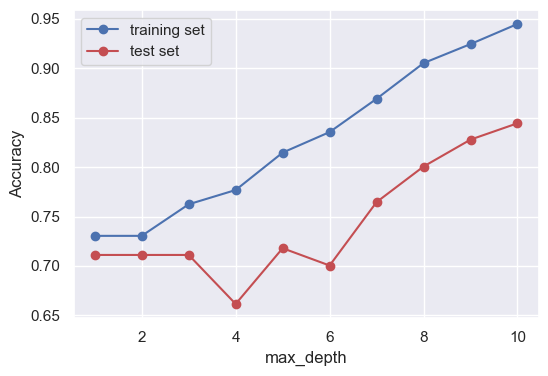

In [33]:
results_dtree = fit_dtree(X, y)
results_dtree

In [34]:
def fit_randomforest(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Apply random oversampling
    Xtrain_ros, ytrain_ros = ros.fit_resample(X_train, y_train)

    results_test = []

    n_estimators_settings = [5, 10, 25, 50]
    max_depth_settings = [2, 3, 4, 5]
    max_features_settings = [0.25, 0.5, 0.75]

    for n_estimators, max_depth, max_features in product(n_estimators_settings, max_depth_settings, max_features_settings):
        model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, max_features=max_features,
                                    n_jobs=1, random_state=42)
        model.fit(Xtrain_ros, ytrain_ros)
        train_score = model.score(Xtrain_ros, ytrain_ros)
        test_score = model.score(X_test, y_test)
        results_test.append([n_estimators, max_depth, max_features,
                            train_score, test_score])

    results = pd.DataFrame(results_test,
                           columns=['n_estimators', 'max_depth',
                                    'max_features', 'train_acc',
                                    'test_acc']).sort_values('test_acc',ascending=False)
    results['train_test_diff'] = results['train_acc'] - results['test_acc']

    return results

In [35]:
results_rf = fit_randomforest(X,y)

# showing top 20 hyperparameter settings
results_rf.head(20)

,n_estimators,max_depth,max_features,train_acc,test_acc,train_test_diff
16,10,3,0.50,0.741729,0.736381,0.005348
22,10,5,0.50,0.778341,0.734436,0.043906
35,25,5,0.75,0.797309,0.733463,0.063846
31,25,4,0.50,0.769960,0.732490,0.037470
19,10,4,0.50,0.771725,0.732490,0.039234
43,50,4,0.50,0.762903,0.731518,0.031385
7,5,4,0.50,0.772828,0.730545,0.042283
46,50,5,0.50,0.795545,0.729572,0.065973
11,5,5,0.75,0.812307,0.729572,0.082735
41,50,3,0.75,0.757830,0.728599,0.029231


In [36]:
def fit_gbm(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Apply random oversampling
    Xtrain_ros, ytrain_ros = ros.fit_resample(X_train, y_train)

    results_test = []

    n_estimators_settings = [5, 10, 25, 50]
    max_depth_settings = [2, 3, 4, 5]
    lr_settings = [0.001, 0.01, 0.1]
    max_features_settings = [0.25, 0.5, 0.75]

    for n_estimators, max_depth, learning_rate, max_features in product(n_estimators_settings, max_depth_settings, lr_settings, max_features_settings):
        gbm = GradientBoostingClassifier(learning_rate=learning_rate,
                                         max_depth=max_depth, n_estimators=n_estimators,
                                         max_features=max_features,random_state=42)
        gbm.fit(Xtrain_ros, ytrain_ros)
        train_score = gbm.score(Xtrain_ros, ytrain_ros)
        test_score = gbm.score(X_test, y_test)
        results_test.append([n_estimators, max_depth,learning_rate, max_features,
                            train_score, test_score])

    results = pd.DataFrame(results_test,
                           columns=['n_estimators', 'max_depth',
                                    'learning_rate', 'max_features',
                                    'train_acc', 'test_acc']).sort_values('test_acc',ascending=False)
    results['train_test_diff'] = results['train_acc'] - results['test_acc']

    return results

In [37]:
results_gbm = fit_gbm(X, y)

# showing top 20 hyperparameter settings
results_gbm.head(20)

,n_estimators,max_depth,learning_rate,max_features,train_acc,test_acc,train_test_diff
143,50,5,0.100,0.75,0.943857,0.842412,0.101445
142,50,5,0.100,0.50,0.929326,0.830739,0.098587
141,50,5,0.100,0.25,0.902686,0.799611,0.103075
107,25,5,0.100,0.75,0.904447,0.798638,0.105809
134,50,4,0.100,0.75,0.881330,0.783074,0.098256
133,50,4,0.100,0.50,0.877587,0.769455,0.108132
106,25,5,0.100,0.50,0.864377,0.766537,0.097840
71,10,5,0.100,0.75,0.853369,0.762646,0.090723
132,50,4,0.100,0.25,0.846103,0.756809,0.089294
70,10,5,0.100,0.50,0.808454,0.754864,0.053591


#### 15. (2 pts) Consolidate all results from the model selection pipeline.

In [38]:
def transform_results_table(results, model_name):

    results2 = results.copy()

    temp = results2.drop(['train_acc','test_acc','train_test_diff'],axis=1)
    results2['hyperparameters'] = temp.apply(lambda row: {col: row[col] for col in temp.columns}, axis=1)
    results2['ML model'] = model_name

    return results2[['ML model', 'hyperparameters','train_acc','test_acc','train_test_diff']].copy()

In [39]:
all_results = {'k-Nearest Neighbors': results_knn,
               'Logistic Regression (L2)': results_logregl2,
               'Logistic Regression (L1)': results_logregl1,
               'SVM (l2)': results_svml2,
               'SVM (l1)': results_svml1,
               'Decision Tree': results_dtree,
               'Random Forest': results_rf,
               'GBM' : results_gbm}


results_lst = []
for model_name, results in all_results.items():
    results_transformed = transform_results_table(results=results,
                                                  model_name=model_name)
    results_lst.append(results_transformed)

In [40]:
consolidated_results = pd.concat(results_lst).reset_index(drop=True).sort_values(['test_acc',
                                                                                  'train_test_diff'],ascending=False)
consolidated_results = consolidated_results.loc[consolidated_results['train_test_diff']>0]

consolidated_results.head(50)

,ML model,hyperparameters,train_acc,test_acc,train_test_diff
0,k-Nearest Neighbors,{'n_neighbors': 1},1.000000,0.905642,0.094358
1,k-Nearest Neighbors,{'n_neighbors': 3},0.976002,0.881323,0.094679
2,k-Nearest Neighbors,{'n_neighbors': 5},0.957508,0.850195,0.107313
46,Decision Tree,{'max_depth': 10},0.944858,0.844358,0.100500
104,GBM,"{'n_estimators': 50.0, 'max_depth': 5.0, 'lear...",0.943857,0.842412,0.101445
105,GBM,"{'n_estimators': 50.0, 'max_depth': 5.0, 'lear...",0.929326,0.830739,0.098587
47,Decision Tree,{'max_depth': 9},0.924508,0.827821,0.096687
3,k-Nearest Neighbors,{'n_neighbors': 7},0.943197,0.823930,0.119267
48,Decision Tree,{'max_depth': 8},0.905252,0.800584,0.104668
106,GBM,"{'n_estimators': 50.0, 'max_depth': 5.0, 'lear...",0.902686,0.799611,0.103075


#### 16. (5 pts) What is your best model and its hyperparameters?

In [41]:
# write the code of the best model here

best_model_info = consolidated_results.loc[104]
best_model_info

ML model                                                         GBM
hyperparameters    {'n_estimators': 50.0, 'max_depth': 5.0, 'lear...
train_acc                                                   0.943857
test_acc                                                    0.842412
train_test_diff                                             0.101445
Name: 104, dtype: object

In [42]:
best_model_params = best_model_info['hyperparameters']
print(best_model_params)

{'n_estimators': 50.0, 'max_depth': 5.0, 'learning_rate': 0.1, 'max_features': 0.75}


#### 17. (2 pts) Refit the best model

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# Apply random oversampling
Xtrain_ros, ytrain_ros = ros.fit_resample(X_train, y_train)

# best_model = KNeighborsClassifier(n_neighbors=1).fit(Xtrain_ros, ytrain_ros)
# best_model = KNeighborsClassifier(n_neighbors=3).fit(Xtrain_ros, ytrain_ros)
# best_model = KNeighborsClassifier(n_neighbors=5).fit(Xtrain_ros, ytrain_ros)

# best_model = DecisionTreeClassifier(max_depth=10).fit(Xtrain_ros, ytrain_ros)
# best_model = DecisionTreeClassifier(max_depth=9).fit(Xtrain_ros, ytrain_ros)

# best_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, max_features=0.5, n_estimators=50).fit(Xtrain_ros, ytrain_ros)
best_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, max_features=0.75, n_estimators=50).fit(Xtrain_ros, ytrain_ros)


# best_model = LinearSVC(penalty='l2', C=15, max_iter=100000).fit(Xtrain_ros, ytrain_ros)
# best_model = LogisticRegression(C=0.001, penalty='l2').fit(Xtrain_ros, ytrain_ros)


#### 18. (2 pts) Show the confusion matrix (in table form, not array form)

In [44]:
from sklearn.metrics import confusion_matrix

# True values
actual = y_test
prediction = best_model.predict(X_test)

In [45]:
class_labels = [1, 0]

cm = confusion_matrix(actual, prediction, labels=class_labels)
cm = pd.DataFrame(cm, columns=[f'Predicted {c}' for c in class_labels],
                 index=[f'Actual {c}' for c in class_labels])
cm

,Predicted 1,Predicted 0
Actual 1,26,24
Actual 0,128,850


#### 19. (4 pts) Evaluate the model using the 4 performance metrics

In [46]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(actual, prediction)

print("Accuracy:", accuracy)

Accuracy: 0.8521400778210116


In [47]:
from sklearn.metrics import precision_score

precision = precision_score(actual, prediction,
                            pos_label=1) # pos_label = what is defined as the positive label

print("Precision:", precision)

Precision: 0.16883116883116883


In [48]:
from sklearn.metrics import recall_score

recall = recall_score(actual, prediction,
                            pos_label=1) # pos_label = what is defined as the positive label

print("Recall:", recall)

Recall: 0.52


In [49]:
from sklearn.metrics import f1_score

f1 = f1_score(actual, prediction,
                            pos_label=1) # pos_label = what is defined as the positive label

print("F1 score:", f1)

F1 score: 0.2549019607843137


#### 20. (2 pts) Is the model significant?

In [50]:
print(f"Accuracy: {np.round(100*accuracy,2)}%")
print(f"Baseline (PCC): {np.round(pcc125)}%")
if 100*accuracy > pcc125:
    print("Model is significant!")
else:
    print("Model is not significant!")

Accuracy: 85.21%
Baseline (PCC): 62.0%
Model is significant!


#### 21. (5 pts) Plot the feature importances

In [51]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/453.1 kB ? eta -:--:--
   -------- ------------------------------- 92.2/453.1 kB 1.7 MB/s eta 0:00:01
   --------------------- ------------------ 245.8/453.1 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 453.1/453.1 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.6 MB 32.8 MB/s eta 0:00:01
   ----------------------- ---------------- 1.5/2.6 MB 24.4 MB/s eta 0:00:01
   --------------------------------- ------ 2.2/2.6 MB 17.4 MB/s eta 0:00:01
   ---------------------------------------  2.6/2.6 MB 21.1 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 15.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/28.1 MB 1.3 MB/s eta 0:00:22
   --- ----

In [52]:
X_train.describe()

,id,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,age_18-30,age_31-40,age_41-50,age_51-60,age_61+,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,37457.432444,0.118432,0.065888,107.646789,29.805671,0.397415,0.000417,0.144287,0.146789,0.158882,0.187239,0.316931,0.756881,0.004170,0.638866,0.187656,0.020851,0.512927,0.542952,0.216013
std,20955.849074,0.323186,0.248138,47.764449,7.250665,0.489465,0.020421,0.351454,0.353969,0.365643,0.390185,0.465377,0.429056,0.064455,0.480430,0.390519,0.142914,0.499937,0.498256,0.411609
min,84.000000,0.000000,0.000000,55.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19592.750000,0.000000,0.000000,76.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38058.500000,0.000000,0.000000,92.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,55447.250000,0.000000,0.000000,116.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,72882.000000,1.000000,1.000000,271.000000,92.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


PermutationExplainer explainer: 2399it [04:28,  8.86it/s]                          


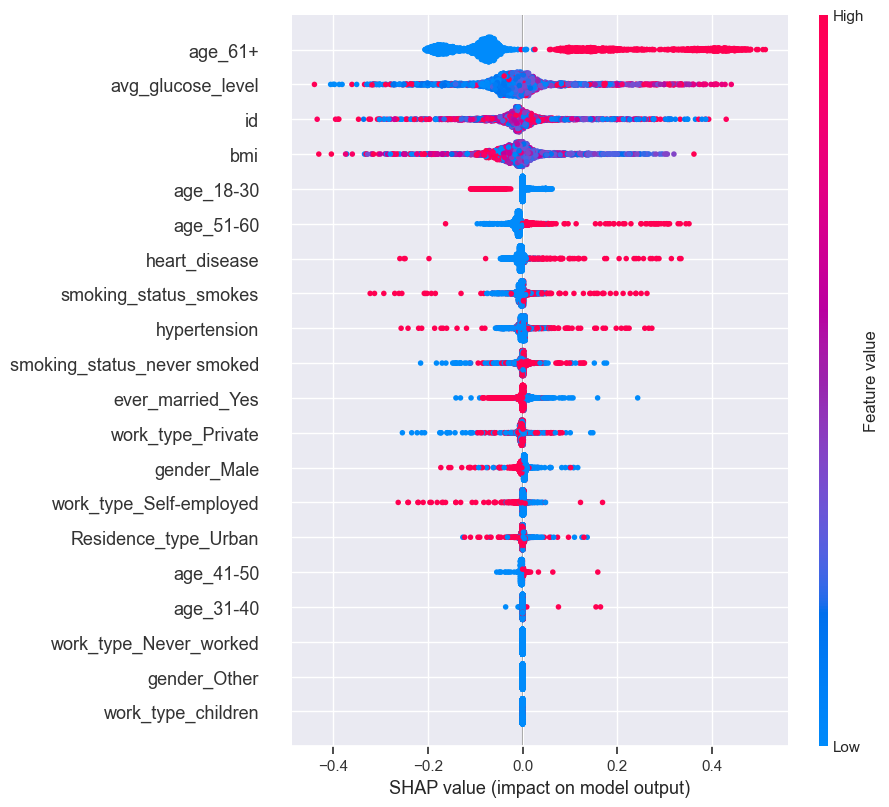

In [53]:
import shap

# Create an explainer object
explainer = shap.Explainer(best_model.predict, X_train)

# Calculate SHAP values
shap_values = explainer(X_train)

# Plot beeswarm
shap.plots.beeswarm(shap_values, max_display=len(X_train.columns))

#### 22. (10 pts)
**GUIDE QUESTION: You are making a pitch about your research to the Philippine government and concerned agencies. You only have limited time and a lightning talk (ie. 5-min talk) is necessary. Suppose you only have at most 5 slides to deliver your message. Write the main points that you will place in each slide.**

##### **Slide 1** - Introduction
---

> - Stroke is one of the leading causes of mortality and disability in the world, causing a significant burden on countries with low and middle income (Sese & Guillermo, 2023). 

> - In the Philippines, during the past ten years, averaging 63,804 deaths per year, stroke mortality has remained high. Despite the COVID pandemic in 2021,  the recorded annual Philippine stroke deaths reached 68,180 from 64,381 in 2020 (Collantes et al., 2022).

> - With the alarming issues on the occurrence of stroke mortality, the group conducted research that focuses on predicting strokes with the most significant risk factors contributing to stroke occurrence with information from 5110 observations.

![Introduction](Introduction.png)

##### **Slide 2** - Problem Statement
---

> - The high incidence of stroke cases in the Philippines requires immediate action, hence predicting stroke to detect any early symptoms based on the health records of an individual.

> - Like other Southeast Asian countries, the Philippines has a problem with limited data on stroke epidemiology (Navarro & Venketasubramanian, 2021). This common problem implies a need for more machine learning models for predicting strokes that use data such as health indicators and demography. 

![Problem Statement](Problem-Statement.png)

##### **Slide 3** - Predicting Stroke
---

> - The research used datasets of 5110 observations where each respondent has 11 attributes, namely Hypertension, Heart Disease, Average Glucose Level (AGL), Body Mass Index (BMI), Smoking Status, Gender, Age, Ever Married, Work Type, and Residence Type (Urban or Rural).

> - This study used 70% to train the model and 30% to test it.

> - The GBM model achieved an accuracy of 94.38% for training and 84.24% for testing the data.

> - The model's results, with 85.21%, show the potential use of the predictive model for stroke.

![Predicting Stroke](Predicting-Stroke.png)

##### **Slide 4** - Potential Impacts
---

> - Predicting strokes as early as possible could lessen the expenditure on the healthcare of an individual since there is immediate action regarding the early signs of stroke.

> - Stroke prediction could reduce the mortality rate of stroke in the Philippines since it is preventable when detected in its early stages.

> - Stroke prediction gives emphasis and awareness to the public to avoid the most significant risk factors to prevent stroke, which could help improve the well-being of everyone.

![Potential Impacts](Potential-Impacts.png)

##### **Slide 5** - Recommendations

> - A machine learning model must have quality input data with an appropriate algorithm for any specific data set to produce a sound output. With this, we must encourage the public to participate in data gathering and ensure that all their data will be anonymized and handled with integrity. 

> - The government must emphasize the importance of predicting strokes since it is evident in our tropical country. With enough funding, the resources will be able to maximize the study for better health care in the Philippines. 

> - Collaborate with other researchers to significantly enhance the scope and impact of the research on stroke and machine learning models on predicting stroke. 

![Recommendations](Recommendations.png)

#### **References:**

- Collantes, M. E., Navarro, J., Belen, A., & Gan, R. (2022). Stroke systems of care in the Philippines: Addressing gaps and developing strategies. *Frontiers in neurology*, 13, 1046351. https://doi.org/10.3389/fneur.2022.1046351

- Navarro, J.C., & Venketasubramanian, N. (2021). Stroke Burden and Services in the Philippines. Cerebrovasc Dis Extra 1. 11 (2): 52–54. https://doi.org/10.1159/000516238

- Sese, L. V. C., & Guillermo, M. C. L. (2023). Strengthening stroke prevention and awareness in the Philippines: a conceptual framework. *Frontiers in neurology*, 14, 1258821. https://doi.org/10.3389/fneur.2023.1258821